In [1]:
import torch
import torch.nn.functional as F
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [2]:
image = Image.open("blurImages/test001.png")

In [3]:
preprocess = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((256,256)),
    transforms.ToTensor(),
])

In [4]:
img_processed = preprocess(image).unsqueeze(0)

In [5]:
blurKernel = torch.tensor([[1/16,1/8,1/16],[1/8,1/4,1/8],[1/16,1/8,1/16]],dtype=torch.float32)

In [6]:
blurKernel = blurKernel.view(1,1,3,3)

In [7]:
blurredImg = F.conv2d(img_processed, blurKernel, padding=1) #convolve the gaussian blur filter

In [8]:
blurredImg = blurredImg + (15/255)*torch.randn_like(blurredImg) #add noise

In [9]:
blurredImg = blurredImg.squeeze()

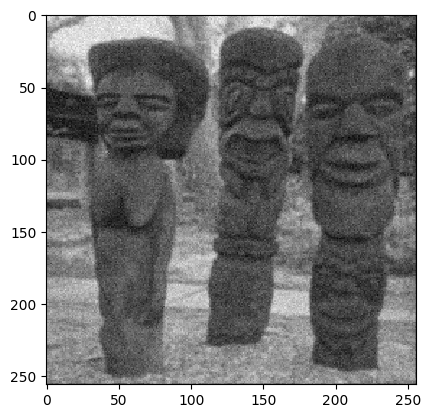

In [10]:
plt.imshow(blurredImg.numpy(),cmap='gray',interpolation='none') #blur + noise

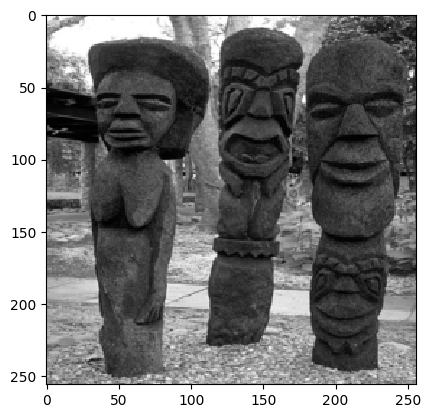

In [11]:
plt.imshow(img_processed.squeeze().numpy(),cmap='gray',interpolation='none') #clean image